<a href="https://colab.research.google.com/github/MatheusABomfim/ML_HTLV_HAM-TSP/blob/main/ML_INT_SIMP_HTLV_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Anotações/lembretes:

*   Script do trabalho "Avaliação do potencial uso de Machine Learning para a predição da mielopatia associada ao HTLV-1 a partir de dados clínicos e marcadores genéticos". Trabalho titulado com menção honrosa no XVI Simpósio HTLV Brasil

*   Foram utilizados dados da egressa Vanessa do LIPa, em conjunto com dados clínicos extaídos por integrantes do laboratório no período de 2023.

*   Esse script é pautado no arquivo: "Pautado no ML Wine data set" com as devidas modificações

*   Essa foi a versão piloto para a minha dissertação de mestrado, utilizando possívelmente MBL2 + ENTPD1 + Dados clínicos + Dados laboratoriais

# Dicionário:
* Na coluna: MBL-550
  * HH = 0
  * HL = 1
  * LL = 2
  
* Na coluna: MBL-221
  * YY = 0
  * YX = 1
  * xx = 2

* Na coluna: MBL EXON
  * AO = 0
  * AA = 1
  * OO = 2

* Na coluna: SEXO
  * M = 0
  * F = 1

* Na coluna: HAM/TSP
 * Sem mielopatia = 0
 * HAM/TSP = 1


In [ ]:
# Atualizando Sklearn
!pip uninstall scikit-learn
!pip install scikit-learn

# Instalando o pacote shap (não consta no google colab)
!pip install shap #Corrigir erro do shap

Found existing installation: scikit-learn 1.2.2
Uninstalling scikit-learn-1.2.2:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/scikit_learn-1.2.2.dist-info/*
    /usr/local/lib/python3.10/dist-packages/scikit_learn.libs/libgomp-a34b3233.so.1.0.0
    /usr/local/lib/python3.10/dist-packages/sklearn/*
Proceed (Y/n)? ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 169, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/uninstall.py", line 105, in run
    uninstall_pathset = req.uninstall(
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/req/req_install.py", line 680, in uninstall
    uninstalled_pathset.remove(auto_confirm, verbose)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/req/req_uninstall.py", line 375, in remove
    if auto_confirm or self._allowed_to_proceed(

In [ ]:
# Importar dados e pacotes de trabalho:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import recall_score, accuracy_score,roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import LabelEncoder
#import shap

dados_iniciais_Vanessa = ('/content/drive/MyDrive/Mestrado/Códigos_Bioinfo_e_docs_relacionados(menos_Python_colab)/Treinamento_inicial_ML/ML_(base_wine_dataset)_para_dados_MBL_Ana_patrícia/Resultados_final(MBL+Clinica)/tabela_Vanessa_Treinamento_ML.csv')

#Ignorando avisos de erro
import warnings
warnings.filterwarnings('ignore')

# Importação e tratamento de dados:

In [ ]:
# Import Data Frame
# Import initial file "dados_iniciais_Vanessa"
df = pd.read_table(dados_iniciais_Vanessa, sep=',')  # sep= parâmetro separador(;)
nome_arquivo = os.path.basename(dados_iniciais_Vanessa).split(".")  # obtem o nome do arquivo = os.path.basename(arquivo) e split obtém o nome em partes separadas por ponto
nome_arquivo = nome_arquivo[0]  # obtem o nome do arquivo sem a extensão
caminho_arquivo = os.path.dirname(dados_iniciais_Vanessa) #obtem o caminho do arquivo, sem o nome dele (arquivo)

In [ ]:
# Avaliação do êxito na importação do dataframe
#print(df)
#df.dtypes
#df.head
print(df.columns)

Index(['NUM AMO', 'NOME', 'REGISTRO', 'SEXO', 'Idade 2018 (2019 AZUL)',
       'HAM/TSP', 'MBL-550', 'MBL -221', 'MBL EXON', 'SINTOMAS',
       'ANO DE DIAGNOSTICO', 'SINT. DET.', 'Incontinência Urinária',
       'dor urinária', 'parestesia', 'Paresia', 'Hipereflexia',
       'Hipereflexia em MMII', 'Hiperatividade', 'fraqueza',
       'caroços no corpo', 'disúria', 'Deficit motor', 'Dormência', 'Dor',
       'Dor Articular', 'Dor na bexiga', 'Dor na lombar', 'Dor em MMII',
       'perda auditiva', 'Hipertensão', 'marcha espática', 'artrose',
       'dificuldade de deambular', 'Perda de força', 'Espasticidade',
       'Noctúria', 'Neuropatia', 'Bexiga neurogênica', 'Surtos psiquicos',
       'Crises compulsivas', 'Insônia', 'hipertomocidade', 'Cadeirante',
       'Mielopatia', 'Câimbras', 'Diabetes', 'Obesidade', 'Depressão ',
       'Ansiedade', 'Poliaciúria', 'Baixo fluxo urinário', 'Esquizofrenia',
       'Problemas nos MMII', 'Edema MMSS', 'Doença psiquiátrica',
       'Osteoporose

**Criando diretório para armazenamento**

In [ ]:
# Verificando Diretorio
diretorio_name = caminho_arquivo + "/" + nome_arquivo  # cria o diretório a partir das variáveis acima de caminho e nome_arquivo
try:
    os.mkdir(diretorio_name)  # tenta criar o diretório
    print("Novo Diretório Criado! \n")
except FileExistsError:
    print("O diretório já existe!")
    print(diretorio_name)
    print("--> Verifique se ele está vazio, ou possui arquivos! \n")

# Formato do dataframe (linhas, colunas)
print('Dados carregados! \nO seu dado apresenta o seguinte quantitativo de (linhas, colunas):', df.shape)

O diretório já existe!
/content/drive/MyDrive/Mestrado/Códigos_Bioinfo_e_docs_relacionados(menos_Python_colab)/Treinamento_inicial_ML/ML_(base_wine_dataset)_para_dados_MBL_Ana_patrícia/Resultados_final(MBL+Clinica)/tabela_Vanessa_Treinamento_ML
--> Verifique se ele está vazio, ou possui arquivos! 

Dados carregados! 
O seu dado apresenta o seguinte quantitativo de (linhas, colunas): (155, 68)


In [ ]:
# Transformação de dados nominais categóricos, por numéricos categóricos:
df['SEXO'] = df['SEXO'].replace('M',0)
df['SEXO'] = df['SEXO'].replace('F',1)
df['HAM/TSP'] = df['HAM/TSP'].replace('NÃO',0)
df['HAM/TSP'] = df['HAM/TSP'].replace('SIM',1)

# Eliminação de dados que estejam nebulosos:
df_filtered = df[df['HAM/TSP'].isin(['1', '0'])]
df_filtered = df[df['HAM/TSP'].isin(['1', '0'])]

# Eliminação de colunas que não serão utilizadas:
df = df.drop('SINTOMAS', axis=1)
df = df.drop('SINT. DET.', axis=1)
df = df.drop('ANO DE DIAGNOSTICO', axis=1)
df = df.drop('NOME', axis=1)
df = df.drop('REGISTRO', axis=1)
df = df.drop('NUM AMO', axis=1)

# Transformação de dados em string em float64:
df['HAM/TSP'] = pd.to_numeric(df['HAM/TSP'],errors = 'coerce')

# Remoção de linhas com valores nulos:
df = df.dropna()

In [ ]:
print(df)
df.shape

     SEXO  Idade 2018 (2019 AZUL)  HAM/TSP  MBL-550  MBL -221  MBL EXON  \
0       0                      68      0.0        1         0         2   
1       1                      32      0.0        0         0         1   
2       0                      54      0.0        2         1         0   
3       0                      36      0.0        1         0         0   
4       0                      41      0.0        1         1         1   
..    ...                     ...      ...      ...       ...       ...   
150     1                      76      0.0        2         0         0   
151     1                      63      0.0        1         0         0   
152     1                      82      0.0        1         0         0   
153     0                      62      0.0        2         0         0   
154     1                      53      0.0        2         0         0   

     Incontinência Urinária  dor urinária  parestesia  Paresia  ...  \
0                         1 

(153, 62)

In [ ]:
# Divisão de dados

# Dados categóricos binários
cat_bin = ['SEXO', 'Idade 2018 (2019 AZUL)', 'HAM/TSP', 'MBL-550', 'MBL -221', 'MBL EXON', 'Incontinência Urinária', 'dor urinária', 'parestesia',
       'Paresia', 'Hipereflexia', 'Hipereflexia em MMII', 'Hiperatividade',
       'fraqueza', 'caroços no corpo', 'disúria', 'Deficit motor', 'Dormência',
       'Dor', 'Dor Articular', 'Dor na bexiga', 'Dor na lombar', 'Dor em MMII',
       'perda auditiva', 'Hipertensão', 'marcha espática', 'artrose',
       'dificuldade de deambular', 'Perda de força', 'Espasticidade',
       'Noctúria', 'Neuropatia', 'Bexiga neurogênica', 'Surtos psiquicos',
       'Crises compulsivas', 'Insônia', 'hipertomocidade', 'Cadeirante',
       'Mielopatia', 'Câimbras', 'Diabetes', 'Obesidade', 'Depressão ',
       'Ansiedade', 'Poliaciúria', 'Baixo fluxo urinário', 'Esquizofrenia',
       'Problemas nos MMII', 'Edema MMSS', 'Doença psiquiátrica',
       'Osteoporose', 'Insuficiência renal crônica',
       'Descontrole esfincteriano', 'Hérnia', 'Dificuldade de urinar',
       'Fraqueza ', 'Hipotireodismo', 'Descontrole urinário',
       'Síndrome piramidal', 'Dermatite', 'Sífilis', 'Infecções recorrentes']

# Dados categóricos Múltiplos
cat_mult= ['SINTOMAS', 'MBL-550', 'MBL -221', 'MBL EXON']

#Todos os dados
all_data = cat_bin + cat_mult

In [ ]:
df.dtypes

SEXO                        int64
Idade 2018 (2019 AZUL)      int64
HAM/TSP                   float64
MBL-550                     int64
MBL -221                    int64
                           ...   
Descontrole urinário        int64
Síndrome piramidal          int64
Dermatite                   int64
Sífilis                     int64
Infecções recorrentes       int64
Length: 62, dtype: object

**Análise de dados pré-ML**

Distribuição de frequência do alvo (HAM/TSP)

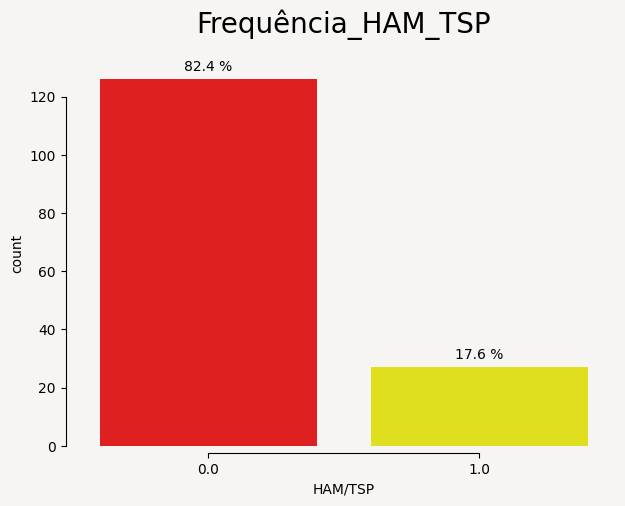

In [ ]:
#Paleta de cores
mypal= ['#FF0000', '#FF4500', '#FFFF00','#FFFFE0', '#87CEEB','#0000CD']

#Gráfico de Barras para Distribuição das Variáveis
plt.figure(figsize=(7, 5),facecolor='#F6F5F4')
total = float(len(df))
ax = sns.countplot(x=df['HAM/TSP'], palette=mypal[0::2])
ax.set_facecolor('#F6F5F4')

for p in ax.patches:

    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.1f} %'.format((height/total)*100), ha="center")

ax.set_title('Frequência_HAM_TSP', fontsize=20, y=1.05)
sns.despine(right=True)
sns.despine(offset=5, trim=True)

# Salvar o gráfico em PDF
plt.savefig('/content/drive/MyDrive/Mestrado/Códigos_Bioinfo_e_docs_relacionados(menos_Python_colab)/Treinamento_inicial_ML/ML_(base_wine_dataset)_para_dados_MBL_Ana_patrícia/Resultados_sem_dados_clínicos/' + 'Frequência_HAM_TSP.pdf')

Matriz de correlação de pearson (heatmap):

In [ ]:
#CORRELAÇÃO
mypal= ['#FF0000', '#FF4500', '#FFFF00','#FFFFE0', '#87CEEB','#0000CD']
metodo_correlacao = "spearman"
df_ = df
corr = df_.corr(method= metodo_correlacao) #method : {'pearson', 'kendall', 'spearman'}
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(50, 50), facecolor=None)
cmap = sns.color_palette(mypal, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, vmin=-1.0, center=0, annot=True,
            square=False, linewidths=1, cbar_kws={"shrink": 0.5})
ax.set_title("Numerical features correlation ("+metodo_correlacao+")", fontsize=15, y= 1.05);


# Salvar o gráfico em PDF
plt.savefig('/content/drive/MyDrive/Mestrado/Códigos_Bioinfo_e_docs_relacionados(menos_Python_colab)/Treinamento_inicial_ML/ML_(base_wine_dataset)_para_dados_MBL_Ana_patrícia/Resultados_final(MBL+Clinica)/tabela_Vanessa_Treinamento_ML' + 'plot_heatmap_corr_pearson.pdf')

plt.show()

Limpeza de dados não numéricos e sem valor preditivo para ML

In [ ]:
print(x)

NameError: name 'x' is not defined

In [ ]:
# Separar as variáveis entre preditoras e variável alvo (style);
y = df['HAM/TSP'] # Variável alvo;
x = df.drop('HAM/TSP', axis = 1) # Variáveis preditoras, sem a alvo;

In [ ]:
# Criando os conjuntos de dados de treino e teste (utilizando o train_test_split):
seed=0
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.3)

In [ ]:
 # Utilizando a classificação por regression tree(ExtraTressClassifier)
 modelo = ExtraTreesClassifier()
 modelo.fit(x_treino, y_treino) # Aplicação do modelo (regression tree),nos dados de treino

 # imprimindo resultados:
 resultado = modelo.score(x_teste, y_teste) # Modelo testado classificando os dados de teste
 print("Acurácia:", resultado)

In [ ]:
# Prever dados específicos:
previsoes = modelo.predict(x_teste[40:45])
previsoes_formatada = ', '.join(str(valor) for valor in previsoes) # concatena lista e converte valores em strings, apresentados separados por ",";

# Utilizando a compreensão de lista com operador ternário para substituir '1' por "vinho branco"
previsoes_formatada = ["Sem mielopatia" if valor == 0 else "HAM/TSP" for valor in previsoes]


print(f"O valor indicado pelo modelo corresponde há: \n{previsoes_formatada} \n")

# Gabarito:
y_teste_lista = y_teste[40:45]
y_teste_lista = ["HAM/TSP" if valor == 1 else "Sem mielopatia" for valor in previsoes]
print(f"O valor real (gabarito), corresponde há:\n{y_teste_lista}")


In [ ]:
#Lista dos pacotes de ML que iremos rodar
classifiers = [
    LogisticRegression(solver="liblinear", random_state=seed),
    KNeighborsClassifier(2),
    SVC(probability=True, random_state=seed),
    DecisionTreeClassifier(random_state=seed),
    RandomForestClassifier(random_state=seed),
    AdaBoostClassifier(random_state=seed),
    GradientBoostingClassifier(random_state=seed),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    MLPClassifier(random_state=seed),
]

#Nome dos algorítimos de ML que utilizaremos
names = [
    'Logistic Regression',
    'Nearest Neighbors',
    'Support Vectors',
    'Decision Tree',
    'Random Forest',
    'AdaBoost',
    'Gradient Boosting',
    'Naive Bayes',
    'Linear DA',
    'Quadratic DA',
    "Neural Net"
]

#criação do modelo
for item, nome in zip(classifiers, names):
  item.fit(x_treino, y_treino)

  #Imprimindo Resultados
  resultado = item.score(x_teste, y_teste)
  print(nome + ": Acurácia do modelo - ", resultado*100, " %")
  with open('/content/drive/MyDrive/Mestrado/Códigos_Bioinfo_e_docs_relacionados(menos_Python_colab)/Treinamento_inicial_ML/ML_(base_wine_dataset)_para_dados_MBL_Ana_patrícia/Resultados_sem_dados_clínicos/'+"Resultado_ML_MBL_sem_dados_clínicos.txt", 'a') as f:
    print(nome + ": Acurácia do modelo - ", resultado*100, " %", file = f)

Ajeitadinho a ser estudado para correções de bug e implementação da curva ROC


In [ ]:
import numpy as np

# Converta x_teste e y_teste em matrizes NumPy
x_teste = np.array(x_teste)
y_teste = np.array(y_teste)

# Verifique a contiguidade da matriz x_teste
if hasattr(x_teste, 'flags') and x_teste.flags.c_contiguous:
    print("x_teste é c-contígua")
else:
    print("x_teste não é c-contígua")

# Verifique a contiguidade da matriz y_teste (se aplicável)
if hasattr(y_teste, 'flags') and y_teste.flags.c_contiguous:
    print("y_teste é c-contígua")
else:
    print("y_teste não é c-contígua")


In [ ]:
import numpy as np

# Converter x_teste em uma matriz c-contígua
x_teste = np.ascontiguousarray(x_teste)

# Verifique a contiguidade da matriz x_teste
if hasattr(x_teste, 'flags') and x_teste.flags.c_contiguous:
    print("x_teste é c-contígua")
else:
    print("x_teste ainda não é c-contígua")


In [ ]:
#SUMÁRIO DOS SCORES
cols=["Classifier", "Accuracy", "Recall", "Precision", "F1"]
#cols=["Classifier", "Accuracy", "ROC_AUC", "Recall", "Precision", "F1"]
data_table = pd.DataFrame(columns=cols)

for name, clf in zip(names, classifiers):
  clf.fit(x_treino, y_treino)

  pred = clf.predict(x_teste)
  accuracy = accuracy_score(y_teste, pred)

  pred_proba = clf.predict_proba(x_teste)[:, 1]

  #fpr, tpr, thresholds = roc_curve(y_teste, pred_proba)
  #roc_auc = auc(fpr, tpr)

  # confusion matric, cm
  cm = confusion_matrix(y_teste, pred)

  # recall: TP/(TP+FN)
  recall = cm[1,1]/(cm[1,1] +cm[1,0])

  # precision: TP/(TP+FP)
  precision = cm[1,1]/(cm[1,1] +cm[0,1])

  # F1 score: TP/(TP+FP)
  f1 = 2*recall*precision/(recall + precision)

  #df = pd.DataFrame([[name, accuracy*100, roc_auc, recall, precision, f1]], columns=cols)
  df = pd.DataFrame([[name, accuracy*100, recall, precision, f1]], columns=cols)
  data_table = data_table.append(df)

score_data = np.round(data_table.reset_index(drop=True), 2)

In [ ]:
#Formatando DADOS como heatmap
score_data.sort_values(by='Accuracy' , ascending = False)\
.style.background_gradient(cmap='coolwarm')\
.bar(subset=["Recall"], color='#ff355d')\
.bar(subset=["Precision"], color='lightseagreen')\
.bar(subset=["F1"], color='gold')\
.to_excel(diretorio_name+"/"+nome_arquivo+"_RESULTADOS_ML.xlsx", engine='openpyxl')

In [ ]:
#PACOTES PARA RODAR O ROC PARA VARIÁVEIS MÚLTIPLAS
from yellowbrick.classifier import ROCAUC
from yellowbrick.datasets import load_game

#criação do modelo
for item, nome in zip(classifiers, names):
  item.fit(x_treino, y_treino)

  #Imprimindo Resultados
  try:
    visualizer = ROCAUC(item, classes=["0", "1", "2"])

    visualizer.fit(x_treino, y_treino)  # Fit the training data to the visualizer
    visualizer.score(x_teste, y_teste)  # Evaluate the model on the test data
    visualizer.show(outpath= diretorio_name+"/"+"O_que_eu_quiser"+"_ROC_curves_"+nome+".png", clear_figure=True)
    visualizer.show

  except:
    print("\n\n ERRO no método: ", nome)
    print("\n\n")

Transformação dos dados gerados em figuras

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregue seu próprio conjunto de dados (substitua pelo caminho do seu arquivo CSV)
seu_dataframe = pd.read_csv("/content/drive/MyDrive/Mestrado/Códigos_Bioinfo_e_docs_relacionados(menos_Python_colab)/Treinamento_inicial_ML/ML_(base_wine_dataset)_para_dados_MBL_Ana_patrícia/Resultados_final(MBL+Clinica)/tabela_Vanessa_Treinamento_ML/Gráficos avaliados Simp-HTLV 2023/Resultados dos modelos de ML Simp-HTLV 2023.xlsx - Sheet1.csv")

# Crie seu gráfico com base no seu conjunto de dados
sns.set_theme(style="whitegrid")
sns.barplot(data=seu_dataframe, x="Classifier", y="Accuracy", hue="Precision", errorbar="sd", palette="dark", alpha=.6, height=6)
plt.xlabel("")
plt.ylabel("Recall")
plt.legend(title="")

# Exiba o gráfico
plt.show()
